## Introduction

## Importing Libraries and Loading Images

### Libraries

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.layers import Dense, Conv2D, Flatten
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

### Load Images

In [2]:
#Directory path
train_data_dir = 'chest_xray/train/'
test_data_dir = 'chest_xray/test/'
val_data_dir = 'chest_xray/val/'

In [3]:
#Get all the data in each generator and reshaping the images
train_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        train_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=500)

test_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        test_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale', 
        batch_size=200)

val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
        val_data_dir, 
        target_size=(128, 128), 
        color_mode = 'grayscale',
        batch_size=16)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [4]:
#Create the datasets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

### Previewing Images

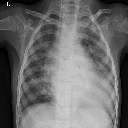

In [5]:
array_to_img(train_images[10])

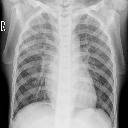

In [6]:
array_to_img(train_images[22])

## Images and Labels

### EDA of the Dataset

In [7]:
#exploring the data set
train_ex = train_images.shape[0]
num_px = train_images.shape[1]
test_ex = test_images.shape[0]
val_ex = val_images.shape[0]

print ("Number of training samples: " + str(train_ex))
print ("Number of testing samples: " + str(test_ex))
print ("Number of validation samples: " + str(val_ex))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 500
Number of testing samples: 200
Number of validation samples: 16
train_images shape: (500, 128, 128, 1)
train_labels shape: (500, 2)
test_images shape: (200, 128, 128, 1)
test_labels shape: (200, 2)
val_images shape: (16, 128, 128, 1)
val_labels shape: (16, 2)


### Images

In [8]:
#Reshaping the images
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

In [9]:
#Previewing the shape of images
print('Train Images:',np.shape(train_img))
print('Test Images:',np.shape(test_img))
print('Validation Images:',np.shape(val_img))

Train Images: (500, 16384)
Test Images: (200, 16384)
Validation Images: (16, 16384)


### Labels

In [10]:
train_labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.

In [11]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [12]:
train_label = np.reshape(train_labels[:, 0], (500,1))
test_label = np.reshape(test_labels[:, 0], (200,1))
val_label = np.reshape(val_labels[:, 0], (16,1))

In [13]:
print('Train Labels:',np.shape(train_label))
print('Test Labels:',np.shape(test_label))
print('Validation Labels:',np.shape(val_label))

Train Labels: (500, 1)
Test Labels: (200, 1)
Validation Labels: (16, 1)


## Baseline Model

### Model

In [14]:
# Build a baseline fully connected model
np.random.seed(42)
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(16384, )))
model.add(layers.Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 131080    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 131,089
Trainable params: 131,089
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Creating a Compile
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [17]:
#Creating history variable
history_bl = model.fit(train_img,
                    train_label,
                    epochs=100,
                    batch_size=80,
                    validation_data=(val_img, val_label))

Epoch 1/100
7/7 [==============================] - 0s 22ms/step - loss: 0.7131 - accuracy: 0.6980 - val_loss: 0.7105 - val_accuracy: 0.5000
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5694 - accuracy: 0.7540 - val_loss: 0.8689 - val_accuracy: 0.5000
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5477 - accuracy: 0.7540 - val_loss: 0.8586 - val_accuracy: 0.5000
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5421 - accuracy: 0.7540 - val_loss: 0.7832 - val_accuracy: 0.5000
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5348 - accuracy: 0.7540 - val_loss: 0.7171 - val_accuracy: 0.5000
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.5355 - accuracy: 0.7540 - val_loss: 0.7905 - val_accuracy: 0.5000
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 0.5192 - accuracy: 0.7540 - val_loss: 0.9071 - val_accuracy: 0.5000
Epoch 8/100
7/7 [=========

7/7 [==============================] - 0s 5ms/step - loss: 0.2441 - accuracy: 0.9380 - val_loss: 0.6416 - val_accuracy: 0.6875
Epoch 60/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2572 - accuracy: 0.9240 - val_loss: 0.7489 - val_accuracy: 0.6875
Epoch 61/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2550 - accuracy: 0.9140 - val_loss: 0.5513 - val_accuracy: 0.8125
Epoch 62/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2432 - accuracy: 0.9320 - val_loss: 1.2596 - val_accuracy: 0.6250
Epoch 63/100
7/7 [==============================] - 0s 6ms/step - loss: 0.2601 - accuracy: 0.9260 - val_loss: 0.6855 - val_accuracy: 0.6875
Epoch 64/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2378 - accuracy: 0.9340 - val_loss: 0.5505 - val_accuracy: 0.8750
Epoch 65/100
7/7 [==============================] - 0s 5ms/step - loss: 0.2395 - accuracy: 0.9380 - val_loss: 0.9567 - val_accuracy: 0.6250
Epoch 66/100
7/7 [===============

### Results

In [18]:
def model_results(tr_img, tr_lab, te_img, te_lab):
    result_train = model.evaluate(tr_img, tr_lab)
    results_test = model.evaluate(te_img, te_lab)
    print(result_train)
    print(results_test)

In [19]:
def model_graphs(hist):
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    loss = hist.history['loss']
    val_loss = hist.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

In [20]:
model_results(train_img, train_label, test_img, test_label)

7/7 [==============================] - 0s 855us/step - loss: 0.6999 - accuracy: 0.7250
[0.18840189278125763, 0.9480000138282776]
[0.6999126672744751, 0.7250000238418579]


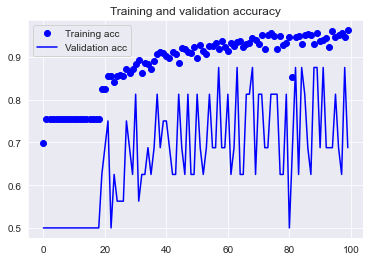

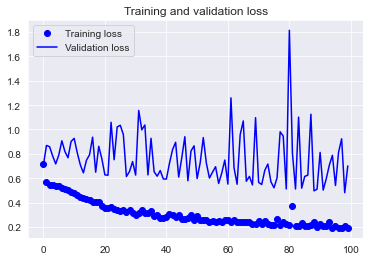

In [21]:
model_graphs(history_bl)

In [ ]:
model.save('Chest_X-ray_baseline.h5')

## CNN

### Datagenerator

In [22]:
#Get all of the data into each generator and modify the images
train_regen = ImageDataGenerator(rescale=1./255)
test_regen = ImageDataGenerator(rescale=1./255)
val_regen = ImageDataGenerator(rescale=1./255)

In [23]:
train_generator = train_regen.flow_from_directory(train_data_dir,
                                                  target_size = (128, 128),
                                                  batch_size = 64,
                                                  color_mode = 'grayscale',
                                                  class_mode = 'binary')
                                                  
test_generator = test_regen.flow_from_directory(test_data_dir,
                                                target_size = (128, 128),
                                                batch_size = 6,
                                                color_mode = 'grayscale',
                                                class_mode = 'binary')

val_generator = val_regen.flow_from_directory(val_data_dir,
                                              target_size = (128, 128),
                                              batch_size = 4,
                                              color_mode = 'grayscale',
                                              class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [24]:
X_train, y_train = next(train_generator)
X_test, y_test = next(test_generator)
X_val, y_val = next(val_generator)

### Model

In [25]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)            

In [27]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [28]:
history_cnn = model.fit(train_generator, 
                    epochs = 40, 
                    validation_data=val_generator)

Epoch 1/20
163/163 [==============================] - 81s 495ms/step - loss: 0.3501 - accuracy: 0.8434 - val_loss: 0.6289 - val_accuracy: 0.6250
Epoch 2/20
163/163 [==============================] - 85s 522ms/step - loss: 0.1419 - accuracy: 0.9465 - val_loss: 0.4656 - val_accuracy: 0.6875
Epoch 3/20
163/163 [==============================] - ETA: 0s - loss: 0.1125 - accuracy: 0.95 - 84s 514ms/step - loss: 0.1125 - accuracy: 0.9597 - val_loss: 0.9970 - val_accuracy: 0.6250
Epoch 4/20
163/163 [==============================] - 89s 545ms/step - loss: 0.0952 - accuracy: 0.9624 - val_loss: 0.1327 - val_accuracy: 1.0000
Epoch 5/20
163/163 [==============================] - 105s 642ms/step - loss: 0.0819 - accuracy: 0.9695 - val_loss: 0.9880 - val_accuracy: 0.6875
Epoch 6/20
163/163 [==============================] - 92s 566ms/step - loss: 0.0769 - accuracy: 0.9716 - val_loss: 0.3772 - val_accuracy: 0.7500
Epoch 7/20
163/163 [==============================] - 80s 493ms/step - loss: 0.0684 - a

### Results

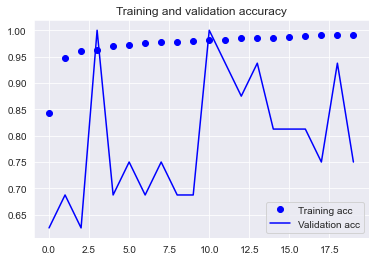

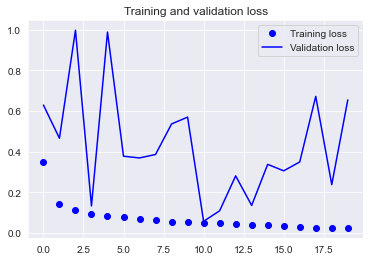

In [29]:
model_graphs(history_cnn)

In [ ]:
model.save('Chest_X-ray_cnn.h5')

## CNN Weighted

### Class Imbalance

>Quick EDAs to see the severity of class imbalance

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [32]:
def imbalance_graphs(data_list):
    
    empty = []
    
    for i in data_list:
        if(i[1] == 0):
            empty.append("NORMAL")
        else:
            empty.append("PNEUMONIA")
    sns.countplot(empty);     

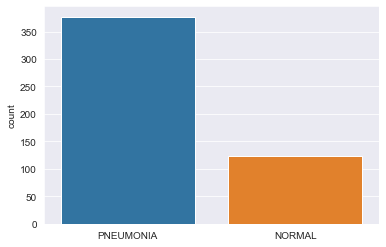

In [33]:
imbalance_graphs(train_labels)

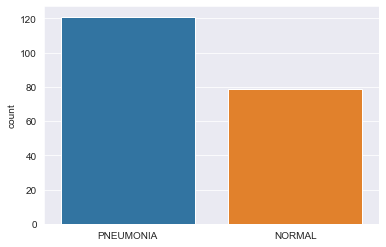

In [34]:
imbalance_graphs(test_labels)

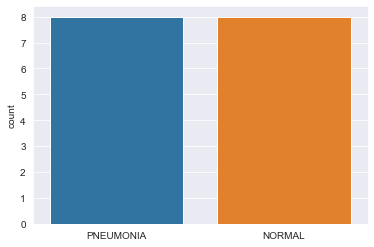

In [35]:
imbalance_graphs(val_labels)

### Model

In [36]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(128, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)            

In [38]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [39]:
history_cnn_w = model.fit(train_generator, 
                    epochs = 40,
                    class_weight = {0: 3., 1: 1.},
                    validation_data=val_generator)

Epoch 1/20
163/163 [==============================] - 91s 560ms/step - loss: 0.5497 - accuracy: 0.8363 - val_loss: 0.3690 - val_accuracy: 0.7500
Epoch 2/20
163/163 [==============================] - 124s 762ms/step - loss: 0.2416 - accuracy: 0.9381 - val_loss: 0.3059 - val_accuracy: 0.8750
Epoch 3/20
163/163 [==============================] - 88s 541ms/step - loss: 0.1909 - accuracy: 0.9500 - val_loss: 0.2048 - val_accuracy: 0.8750
Epoch 4/20
163/163 [==============================] - 80s 490ms/step - loss: 0.1577 - accuracy: 0.9588 - val_loss: 0.1906 - val_accuracy: 0.8750
Epoch 5/20
163/163 [==============================] - 73s 449ms/step - loss: 0.1399 - accuracy: 0.9640 - val_loss: 0.1530 - val_accuracy: 0.9375
Epoch 6/20
163/163 [==============================] - 70s 430ms/step - loss: 0.1245 - accuracy: 0.9689 - val_loss: 0.2907 - val_accuracy: 0.8750
Epoch 7/20
163/163 [==============================] - 70s 427ms/step - loss: 0.1067 - accuracy: 0.9720 - val_loss: 0.0840 - val_a

### Results

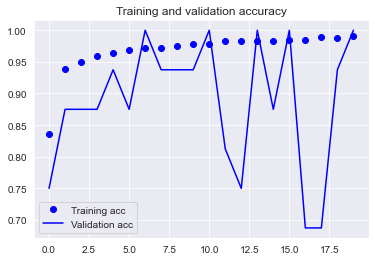

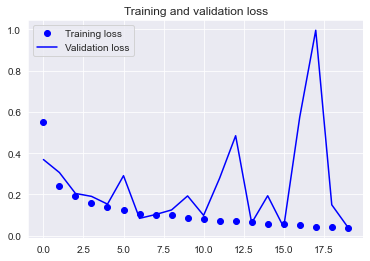

In [40]:
model_graphs(history_cnn_w)

In [ ]:
model.save('Chest_X-ray_weighted_cnn.h5')

## CNN Final Model

### GridSearch

### Model

### Results

## Conclusion 

## Play Testing

#### *Augmentation Generator Dataset (Unused)

Both the train set and test has a severe class imbalance so we will need to preform some data augmentation to create more normal images to match the number of pneumonia images. Whereas the validation set is equal so it will not need any adjustment.

In [41]:
# train_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=30, 
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.2, 
#                                    zoom_range=0.2, 
#                                    vertical_flip=True)

In [42]:
# test_aug_gen = ImageDataGenerator(rescale=1./255, 
#                                    rotation_range=30, 
#                                    width_shift_range=0.3, 
#                                    height_shift_range=0.2,  
#                                    zoom_range=0.2, 
#                                    vertical_flip=True)

In [43]:
# #Get all the data in each generator and reshaping the images
# train_generator = train_aug_gen.flow_from_directory(
#         train_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=500)

# test_generator = test_aug_gen.flow_from_directory(
#         test_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale', 
#         batch_size=6)

# val_generator = ImageDataGenerator(rescale = 1./255).flow_from_directory(
#         val_data_dir, 
#         target_size=(128, 128), 
#         color_mode = 'grayscale',
#         batch_size=4)

In [44]:
# train_images, train_labels = next(train_generator)
# test_images, test_labels = next(test_generator)
# val_images, val_labels = next(val_generator)

In [45]:
# imbalance_graphs(train_labels)

In [46]:
# imbalance_graphs(test_labels)

#### Model

In [47]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',
#                         input_shape=(128, 128,  1)))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(32, (4, 4), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))

# model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# model.compile(loss='binary_crossentropy',
#               optimizer= 'sgd',
#               metrics=['accuracy'])

In [48]:
# model.summary()

In [49]:
# history_da = model.fit(test_generator,
#                     epochs= 50, 
#                     class_weight = {0: 2., 1: 1.},
#                     validation_data=val_generator) 

#### Results

In [50]:
# model_results(X_train, y_train, X_test, y_test)

In [51]:
# model_graphs(history_da)